In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import statsmodels.api as sm
df = pd.read_csv('dataset2 final.csv')
df

,Sales_Rep,Business,Age,Female,Years,College,Personality,Certficates,Feedback,Salary,customer-satisfaction-score,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,1.0,1.0,59.0,1.0,2.0,1.0,0.0,1.0,2.01,70200.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,1.0,52.0,0.0,10.0,1.0,0.0,4.0,3.64,133000.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,0.0,47.0,1.0,1.0,1.0,1.0,1.0,3.88,52600.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,1.0,61.0,0.0,2.0,1.0,0.0,3.0,2.70,96000.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,0.0,39.0,0.0,1.0,0.0,0.0,5.0,3.44,122000.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21988,21989.0,0.0,29.0,0.0,4.0,1.0,3.0,2.0,3.68,70000.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21989,21990.0,0.0,23.0,1.0,2.0,1.0,1.0,1.0,2.13,47400.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.drop(df.columns[[11,12,13,14,15,16,17]],axis=1,inplace=True)

In [3]:
df=df.drop(labels=[21992,21991,21990],axis=0)
df

,Sales_Rep,Business,Age,Female,Years,College,Personality,Certficates,Feedback,Salary,customer-satisfaction-score
0,1.0,1.0,59.0,1.0,2.0,1.0,0.0,1.0,2.01,70200.0,5.0
1,2.0,1.0,52.0,0.0,10.0,1.0,0.0,4.0,3.64,133000.0,10.0
2,3.0,0.0,47.0,1.0,1.0,1.0,1.0,1.0,3.88,52600.0,8.0
3,4.0,1.0,61.0,0.0,2.0,1.0,0.0,3.0,2.70,96000.0,6.0
4,5.0,0.0,39.0,0.0,1.0,0.0,0.0,5.0,3.44,122000.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
21985,21986.0,0.0,44.0,0.0,1.0,1.0,0.0,4.0,1.80,128000.0,7.0
21986,21987.0,0.0,23.0,1.0,6.0,1.0,3.0,6.0,1.77,53400.0,8.0
21987,21988.0,1.0,48.0,1.0,4.0,1.0,2.0,0.0,2.46,50400.0,4.0
21988,21989.0,0.0,29.0,0.0,4.0,1.0,3.0,2.0,3.68,70000.0,10.0


In [4]:
df.isna().sum()

Sales_Rep                      0
Business                       0
Age                            0
Female                         0
Years                          0
College                        0
Personality                    0
Certficates                    0
Feedback                       0
Salary                         0
customer-satisfaction-score    0
dtype: int64

In [5]:
df.describe(include='all')

,Sales_Rep,Business,Age,Female,Years,College,Personality,Certficates,Feedback,Salary,customer-satisfaction-score
count,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000
mean,10995.500000,0.448386,41.495953,0.383038,2.646385,0.796726,1.034152,2.612187,2.664525,73673.778990,6.278445
std,6348.110546,0.497340,11.413748,0.486138,2.434109,0.402444,0.994353,1.648258,0.836770,22769.906232,2.163074
min,1.000000,0.000000,21.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.080000,21000.000000,1.000000
25%,5498.250000,0.000000,32.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.990000,57000.000000,5.000000
50%,10995.500000,0.000000,41.000000,0.000000,2.000000,1.000000,1.000000,2.000000,2.660000,70000.000000,6.000000
75%,16492.750000,1.000000,51.000000,1.000000,2.000000,1.000000,2.000000,4.000000,3.390000,87000.000000,8.000000
max,21990.000000,1.000000,65.000000,1.000000,13.000000,1.000000,3.000000,6.000000,4.000000,197000.000000,10.000000


In [6]:
df.corr()

,Sales_Rep,Business,Age,Female,Years,College,Personality,Certficates,Feedback,Salary,customer-satisfaction-score
Sales_Rep,1.000000,0.000872,0.011863,-0.008132,-0.003577,-0.000949,-0.008251,-0.007201,0.001575,-0.006950,-0.001697
Business,0.000872,1.000000,0.242106,-0.082904,0.101416,-0.044924,-0.004482,-0.094987,0.014701,0.072924,-0.010757
Age,0.011863,0.242106,1.000000,-0.018215,0.057280,-0.012218,0.009900,-0.022949,0.000305,0.263914,0.037149
Female,-0.008132,-0.082904,-0.018215,1.000000,-0.007821,0.007945,0.005206,0.002982,0.012601,-0.162976,0.016073
Years,-0.003577,0.101416,0.057280,-0.007821,1.000000,-0.009223,-0.002864,-0.008271,0.001754,0.093080,0.203127
College,-0.000949,-0.044924,-0.012218,0.007945,-0.009223,1.000000,0.007348,0.012031,-0.004053,0.209714,0.085031
Personality,-0.008251,-0.004482,0.009900,0.005206,-0.002864,0.007348,1.000000,0.006722,-0.001250,-0.250324,-0.332869
Certficates,-0.007201,-0.094987,-0.022949,0.002982,-0.008271,0.012031,0.006722,1.000000,-0.004496,0.458440,0.455468
Feedback,0.001575,0.014701,0.000305,0.012601,0.001754,-0.004053,-0.001250,-0.004496,1.000000,0.312452,0.277614
Salary,-0.006950,0.072924,0.263914,-0.162976,0.093080,0.209714,-0.250324,0.458440,0.312452,1.000000,0.549931


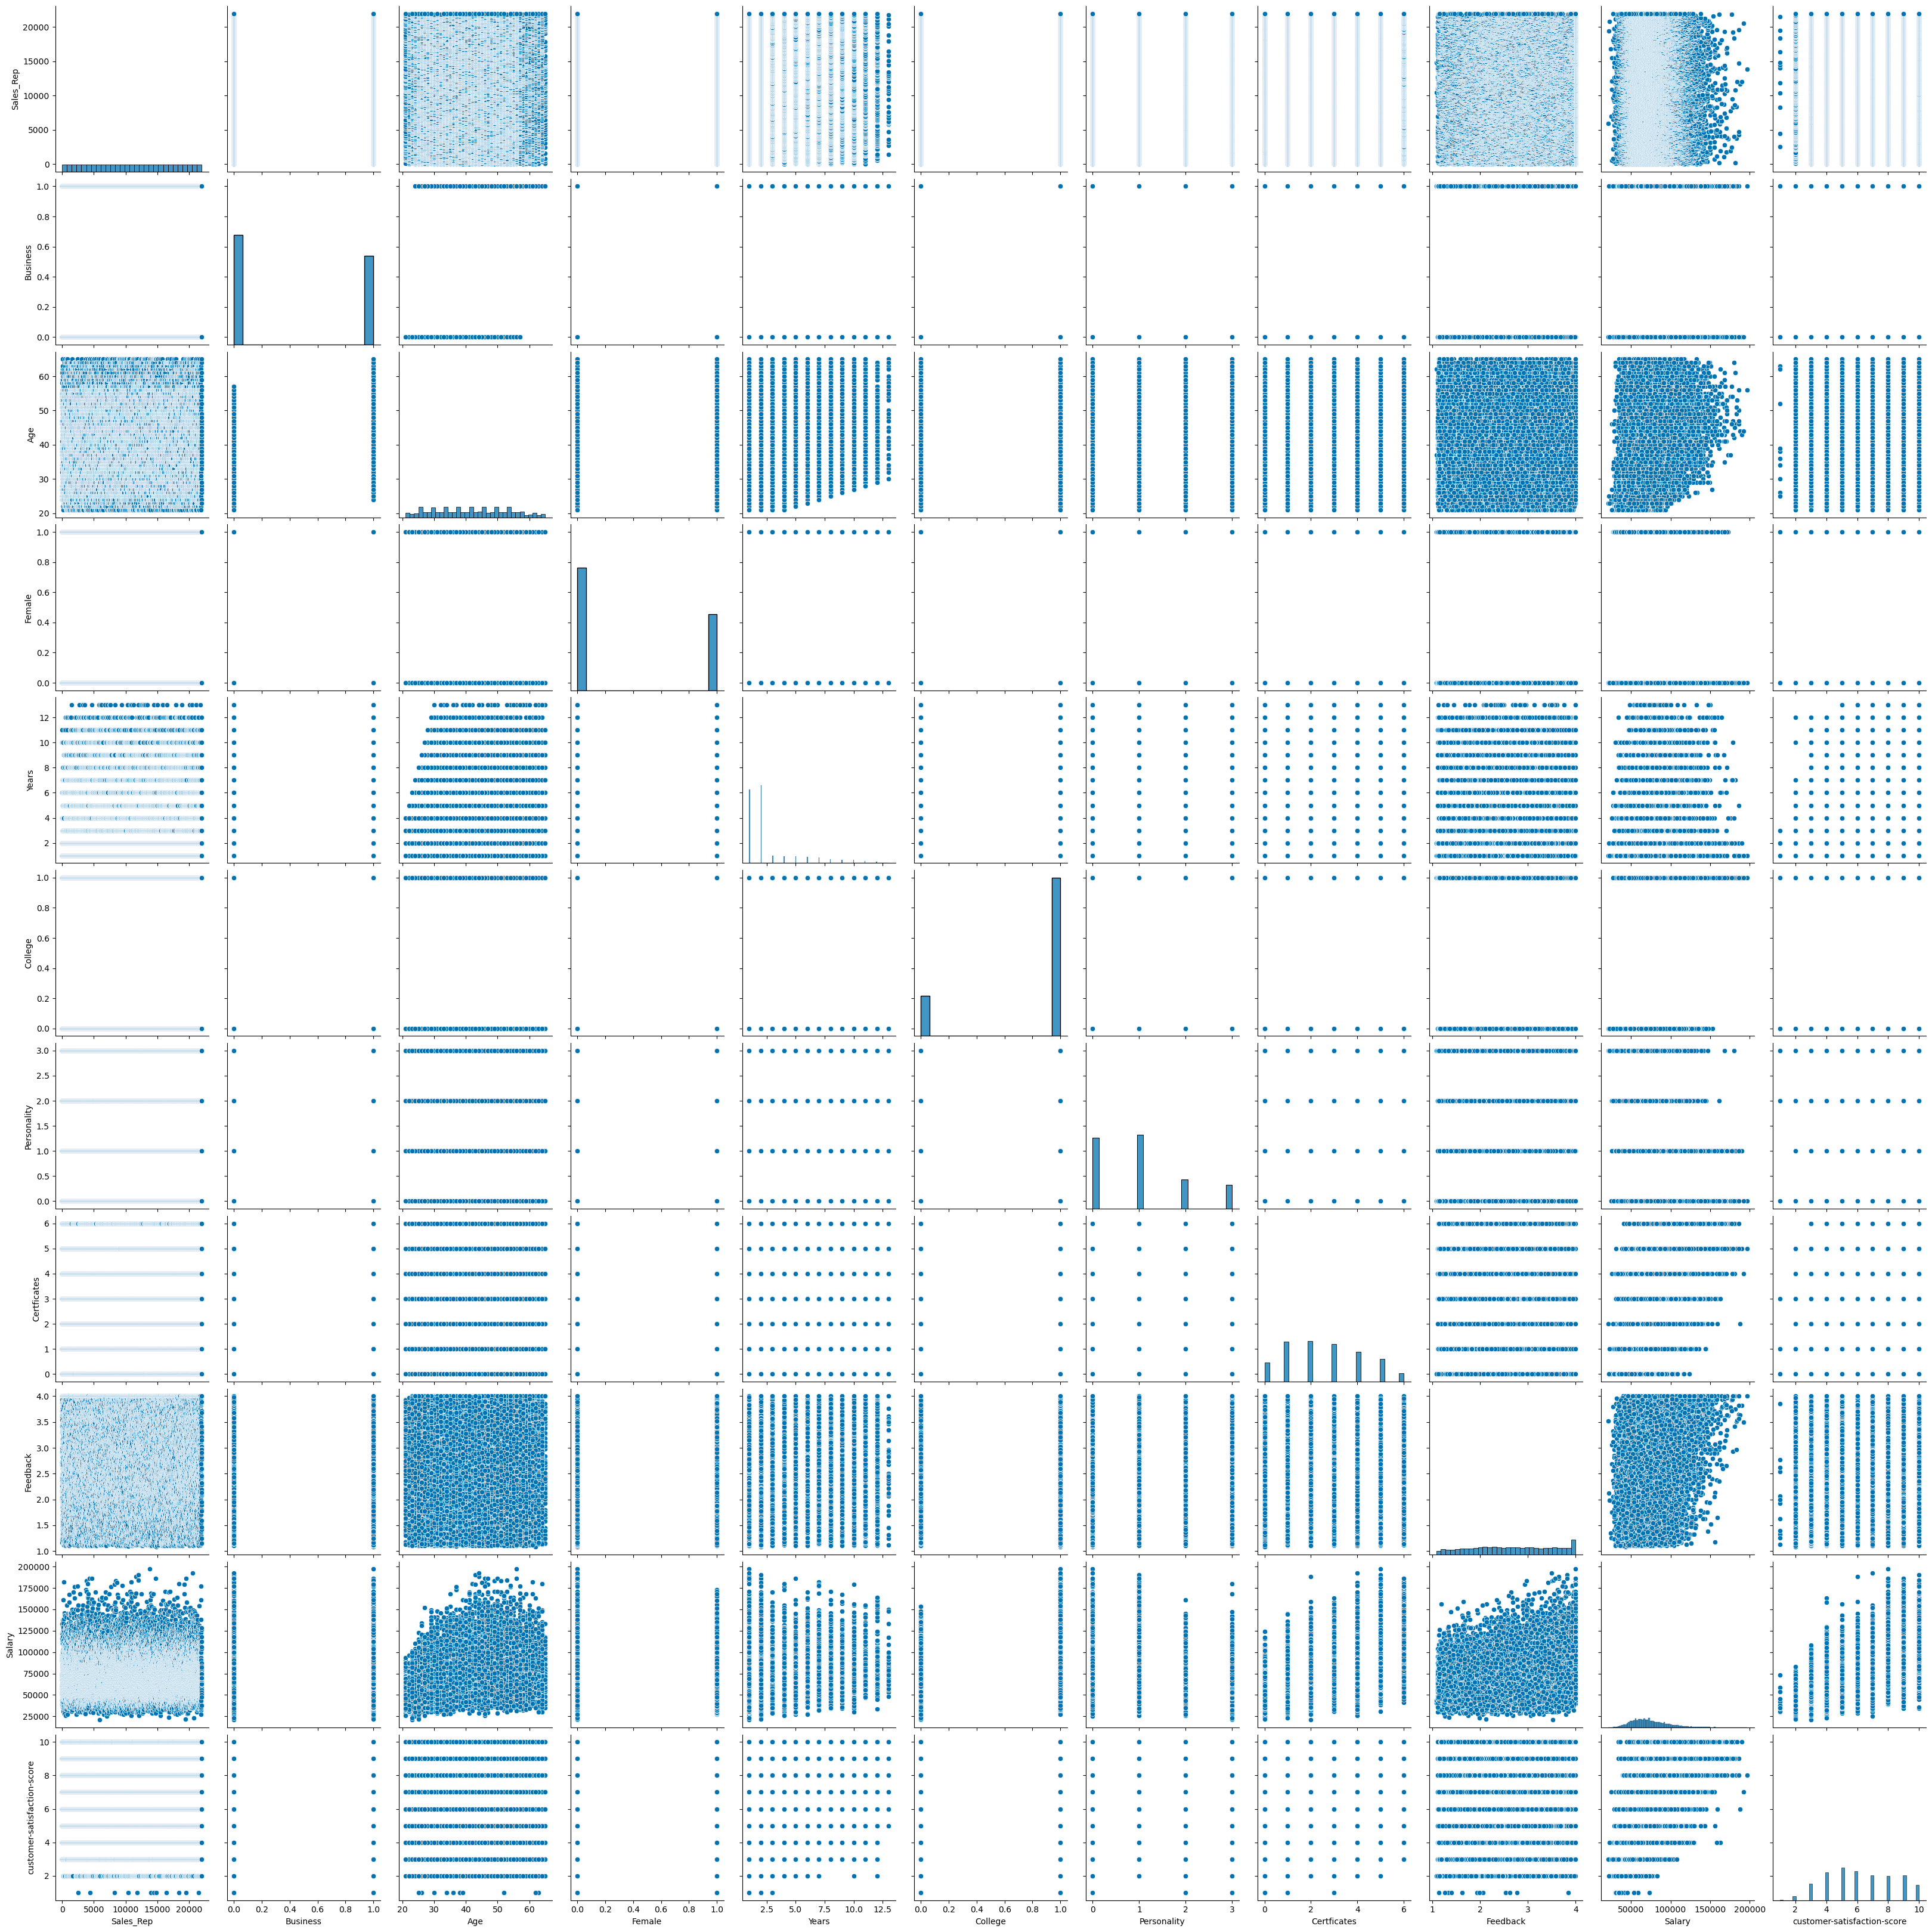

In [7]:
sns.set_palette('colorblind')
sns.pairplot(data=df, height=3)

In [8]:
#define response variable
y = df['Salary']

#define predictor variables
x = df[['Sales_Rep', 'Business', 'Age', 'Female','Years','College','Personality','Certficates','Feedback','customer-satisfaction-score']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     2751.
Date:                Tue, 13 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:57:49   Log-Likelihood:            -2.4291e+05
No. Observations:               21990   AIC:                         4.858e+05
Df Residuals:                   21979   BIC:                         4.859e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [9]:
# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(x, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 3501.43987242422
Coefficients: [ 0.00000000e+00 -3.55483664e-02  1.64296671e+03  5.08311418e+02
 -7.66564202e+03  3.02322968e+02  1.10387450e+04 -4.15687416e+03
  5.07419795e+03  6.92452512e+03  2.33632561e+03]


In [10]:
y_pred= regr.predict(x)
#Predicted values
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [ 69786.61510839 114503.82323207  77542.48196312 ...  51409.99795084
  76232.11680053  45736.83317077]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [12]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = regressor.predict(X_test)
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2 = df1.head(25)
print(df2)

         Actual      Predicted
4610    69000.0   81866.500501
20566   97000.0  100429.335783
2971    52600.0   64531.848118
2955    57000.0   64533.253249
11422   58000.0   89521.590991
1190    95000.0   89324.740160
21951   64800.0   71944.943581
6028    55000.0   57328.566900
1911    45000.0   38340.504681
18253   79000.0   66759.463506
15146   68000.0   79995.769753
17319   92400.0   82531.622728
16020   84400.0   85409.436712
3806   143000.0  111400.841125
17990   46400.0   52933.716901
12233   65000.0   76094.706600
6146    85000.0   77139.690587
2137    54000.0   50551.048196
11464   98200.0   89818.049673
8985    59600.0   66882.239944
2582    59000.0   66028.102094
8191    53000.0   81244.085569
20960   85000.0   96581.443682
8560    64200.0   62486.813734
10855   43200.0   43398.985379


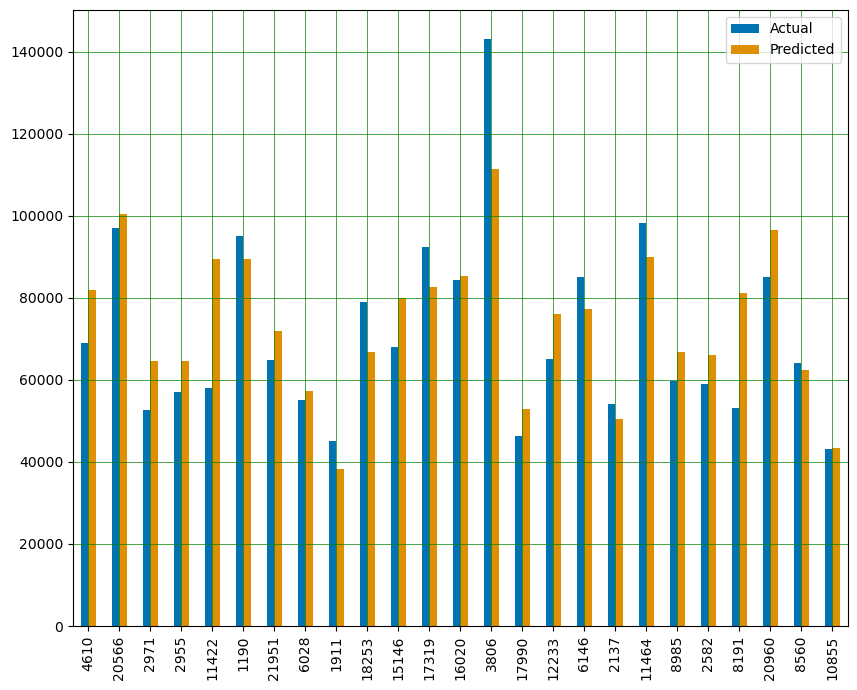

In [14]:
df2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

The Regression equation
y = 3501.4399(const)-0.0355(Sales_Rep)+1642.9667(Business)+508.3114(Age)-7665.6420(Female)+302.3230(Years)
+0.000114(College)-4156.8742(Personality)+5074.1979(Certificates)+6924.5251(Feedback)+2336.3256(Customer-satisfaction-score)

